<a href="https://colab.research.google.com/github/TANGTHEMANH/phan_tich_du_lieu/blob/master/coronavirus_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [ ]:
#Import the dataset from this address.
data = pd.read_csv('/content/owid-covid-data.csv')

In [ ]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42516 entries, 0 to 42515
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    42516 non-null  object 
 1   continent                                   40053 non-null  object 
 2   location                                    42516 non-null  object 
 3   date                                        42516 non-null  object 
 4   total_cases                                 39732 non-null  float64
 5   new_cases                                   42489 non-null  float64
 6   new_cases_smoothed                          42314 non-null  float64
 7   total_deaths                                37902 non-null  float64
 8   new_deaths                                  42500 non-null  float64
 9   new_deaths_smoothed                         42325 non-null  float64
 10  total_case

In [ ]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.973200e+04,4.248900e+04,4.231400e+04,3.790200e+04,42500.000000,42325.000000,39732.000000,42488.000000,42313.000000,37901.000000,...,25280.000000,15425.000000,30204.000000,40052.000000,32666.000000,4.251500e+04,1126.000000,1126.000000,1126.000000,1126.000000
mean,4.382511e+06,9.178854e+03,9.214691e+03,5.456845e+04,69.692776,69.971840,95076.305794,174.363648,175.038257,968.732543,...,33.319062,60.531228,3.457736,75.278238,0.761292,1.978327e+08,28399.355442,10.039201,14.213579,1859.273028
std,2.394730e+07,1.064795e+05,1.031875e+05,2.084871e+05,356.262301,349.410838,136704.192400,811.672130,497.491061,1157.142279,...,12.097305,31.979156,2.522390,5.671057,0.116587,8.174508e+08,97894.964272,12.486204,27.898553,2635.163067
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.300000,11.035000,0.400000,61.150000,0.452000,1.587700e+04,-8543.400000,-27.640000,-66.400000,-1045.504300
25%,7.305000e+03,0.000000e+00,2.286000e+00,1.010000e+02,0.000000,0.000000,2773.336000,0.000000,0.909000,59.470000,...,23.900000,26.664000,1.700000,73.000000,0.718000,2.816460e+05,15.525000,0.392500,-0.717500,12.532232
50%,6.266800e+04,2.100000e+01,4.457100e+01,1.095500e+03,0.000000,0.286000,36755.576500,3.669000,17.892000,539.868000,...,31.400000,79.807000,2.890000,75.880000,0.778000,3.233530e+06,8119.649750,8.230000,6.460000,909.910930
75%,5.363145e+05,5.010000e+02,6.689642e+02,1.017450e+04,7.000000,7.857000,123848.627000,79.518750,144.943000,1590.622000,...,44.400000,88.469000,4.700000,78.570000,0.838000,2.617741e+07,21689.700000,18.720000,18.580000,2368.709475
max,2.972291e+08,7.214604e+06,6.109943e+06,1.632001e+06,7436.000000,5735.000000,679249.346000,27661.347000,9383.350000,5655.596000,...,52.100000,97.164000,11.000000,83.730000,0.944000,4.721383e+09,836347.750000,56.240000,245.440000,10291.122000


In [ ]:
# Loại bỏ các cột không cần thiết
data = data.drop(['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed'], axis=1)
data.head(5) 

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# Thay thế giá trị thiếu bằng giá trị trung bình của cột
data = data.fillna(data.mean())
data.tail(5)

<ipython-input-9-2e0483d08b8b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
42511,Africa,Burkina Faso,2021-10-13,14640.0,54.0,203.0,0.0,645.680,2.382000,1.493000,...,23.900000,11.877000,0.400000,61.580000,0.452000,2.267376e+07,28399.355442,10.039201,14.213579,1859.273028
42512,Africa,Burkina Faso,2021-10-14,14657.0,17.0,203.0,0.0,646.430,0.750000,1.405000,...,23.900000,11.877000,0.400000,61.580000,0.452000,2.267376e+07,28399.355442,10.039201,14.213579,1859.273028
42513,Africa,Burkina Faso,2021-10-15,14686.0,29.0,203.0,0.0,647.709,1.279000,1.437000,...,23.900000,11.877000,0.400000,61.580000,0.452000,2.267376e+07,28399.355442,10.039201,14.213579,1859.273028
42514,Africa,Burkina Faso,2021-10-16,14734.0,48.0,203.0,0.0,649.826,2.117000,1.506000,...,23.900000,11.877000,0.400000,61.580000,0.452000,2.267376e+07,28399.355442,10.039201,14.213579,1859.273028
42515,Africa,Burkina Faso,2021-10-17,14752.0,18.0,203.0,0.0,650.600,174.363648,175.038257,...,33.319062,60.531228,3.457736,75.278238,0.761292,1.978327e+08,28399.355442,10.039201,14.213579,1859.273028


In [ ]:
# Chuyển đổi định dạng của cột "date" thành kiểu datetime
data['date'] = pd.to_datetime(data['date'])
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
# import pandas as pd

# # Đọc dữ liệu vào DataFrame
# data = pd.read_csv('/content/owid-covid-data.csv')

# Lọc dữ liệu cho Việt Nam
data_vn = data.loc[data['location'] == 'Vietnam']

# In ra 5 dòng đầu tiên của dữ liệu cho Việt Nam
print(data_vn.head(5))

       iso_code continent location        date  total_cases  new_cases  \
302838      VNM      Asia  Vietnam  2020-01-03          NaN        0.0   
302839      VNM      Asia  Vietnam  2020-01-04          NaN        0.0   
302840      VNM      Asia  Vietnam  2020-01-05          NaN        0.0   
302841      VNM      Asia  Vietnam  2020-01-06          NaN        0.0   
302842      VNM      Asia  Vietnam  2020-01-07          NaN        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
302838                 NaN           NaN         0.0                  NaN   
302839                 NaN           NaN         0.0                  NaN   
302840                 NaN           NaN         0.0                  NaN   
302841                 NaN           NaN         0.0                  NaN   
302842                 NaN           NaN         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
302838  ...

In [ ]:
# Tính số ca nhiễm mới trung bình mỗi ngày tại Việt Nam
mean_new_cases_vn = data_vn['new_cases'].mean()

print("Số ca nhiễm mới trung bình mỗi ngày tại Việt Nam là:", mean_new_cases_vn)

Số ca nhiễm mới trung bình mỗi ngày tại Việt Nam là: 9430.93327908869


In [ ]:
# Tính tổng số ca nhiễm, số ca tử vong và số ca phục hồi
total_cases_vn = data_vn['total_cases'].max()
total_deaths_vn = data_vn['total_deaths'].max()

print("Tổng số ca nhiễm tại Việt Nam là:", total_cases_vn)
print("Tổng số ca tử vong tại Việt Nam là:", total_deaths_vn)

# Tính mức tăng hàng ngày về số ca nhiễm và số ca tử vong
new_cases_vn = data_vn['new_cases'].sum()
new_deaths_vn = data_vn['new_deaths'].sum()

print("Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là:", new_cases_vn)
print("Mức tăng hàng ngày về số ca tử vong tại Việt Nam là:", new_deaths_vn)

Tổng số ca nhiễm tại Việt Nam là: 11590617.0
Tổng số ca tử vong tại Việt Nam là: 43201.0
Mức tăng hàng ngày về số ca nhiễm tại Việt Nam là: 11590617.0
Mức tăng hàng ngày về số ca tử vong tại Việt Nam là: 43236.0


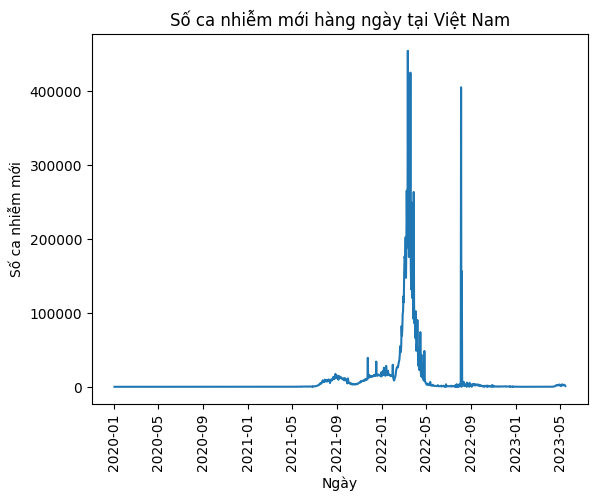

In [ ]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới hàng ngày tại Việt Nam
plt.plot(data_vn['date'], data_vn['new_cases'])
plt.title('Số ca nhiễm mới hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm mới')
plt.xticks(rotation=90)
plt.show()

<ipython-input-62-52a3526dd87d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='new_cases', data=data_vn, palette='Blues', label='Số ca nhiễm mới')
<ipython-input-62-52a3526dd87d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='new_deaths', data=data_vn, palette='Reds', label='Số ca tử vong mới')


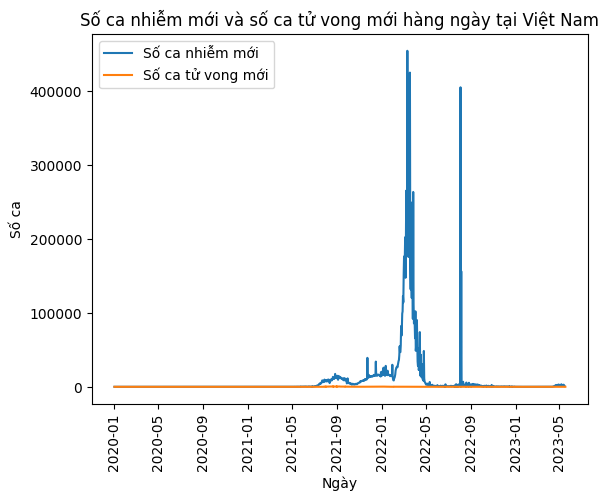

In [ ]:
# Tạo biểu đồ đường thể hiện số ca nhiễm mới và số ca tử vong mới hàng ngày tại Việt Nam
sns.lineplot(x='date', y='new_cases', data=data_vn, palette='Blues', label='Số ca nhiễm mới')
sns.lineplot(x='date', y='new_deaths', data=data_vn, palette='Reds', label='Số ca tử vong mới')
plt.title('Số ca nhiễm mới và số ca tử vong mới hàng ngày tại Việt Nam')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.xticks(rotation=90)

# Định dạng trục x để chỉ hiển thị tháng và năm cách nhau 4 tháng
ax = plt.gca()
# ax.xaxis.set_major_locator(pd.DateOffset(months=4))

plt.legend()
plt.show()

In [ ]:
# Thay thế các giá trị thiếu bằng giá trị 0
data_vn['total_deaths'].fillna(0, inplace=True)
data_vn['total_cases'].fillna(0, inplace=True)
data_vn['people_vaccinated'].fillna(0, inplace=True)

# Tính số ca hồi phục tại Việt Nam
total_recovered_vn = data_vn['total_cases'].max() - data_vn['total_deaths'].max()

print("Tổng số ca hồi phục tại Việt Nam là:", total_recovered_vn)

Tổng số ca hồi phục tại Việt Nam là: 11547416.0


<ipython-input-90-5f1d6ac89f6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn['total_deaths'].fillna(0, inplace=True)
<ipython-input-90-5f1d6ac89f6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn['total_cases'].fillna(0, inplace=True)
<ipython-input-90-5f1d6ac89f6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn['people_vaccinated'].fillna(0, inplace=True)


<ipython-input-94-47b7fe6ede1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn["cases_per_capita"] = data_vn["total_cases"] / data_vn["population"]
<ipython-input-94-47b7fe6ede1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn["deaths_per_capita"] = data_vn["total_deaths"] / data_vn["population"]


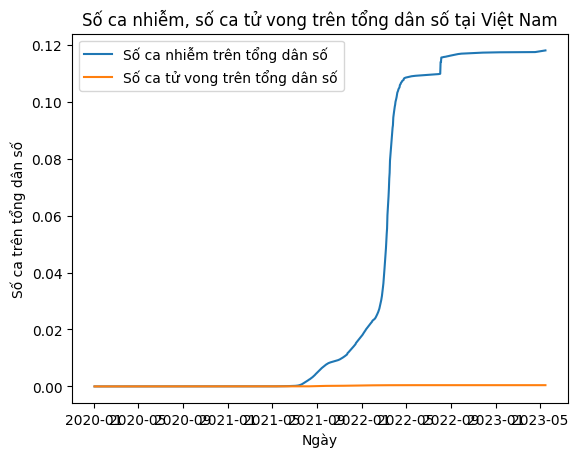

In [ ]:
#Tính toán số ca nhiễm, số ca tử vong và số ca hồi phục trên tổng dân số và lưu trữ chúng trong cột mới trong bảng dữ liệu:
data_vn["cases_per_capita"] = data_vn["total_cases"] / data_vn["population"]
data_vn["deaths_per_capita"] = data_vn["total_deaths"] / data_vn["population"]

#Tạo biểu đồ sử dụng Matplotlib
import matplotlib.pyplot as plt

plt.plot(data_vn["date"], data_vn["cases_per_capita"], label="Số ca nhiễm trên tổng dân số")
plt.plot(data_vn["date"], data_vn["deaths_per_capita"], label="Số ca tử vong trên tổng dân số")

plt.title("Số ca nhiễm, số ca tử vong trên tổng dân số tại Việt Nam")
plt.xlabel("Ngày")
plt.ylabel("Số ca trên tổng dân số")
plt.legend()
plt.show()

In [ ]:
# Lọc ra các hàng liên quan đến Việt Nam
data_vn = data[data["location"] == "Vietnam"]

# Tính toán bình quân số lượng vaccine mỗi người được tiêm
average_vacc_per_person = data_vn["total_vaccinations"].max() / data_vn["people_vaccinated"].max()

print("Bình quân số lượng vaccine mỗi người được tiêm là:", round(average_vacc_per_person, 2))

Bình quân số lượng vaccine mỗi người được tiêm là: 2.95


<ipython-input-87-6831586a185e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn["date"] = pd.to_datetime(data_vn["date"])
<ipython-input-87-6831586a185e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn["vaccine_per_person"] = data_vn["total_vaccinations"] / data_vn["population"]


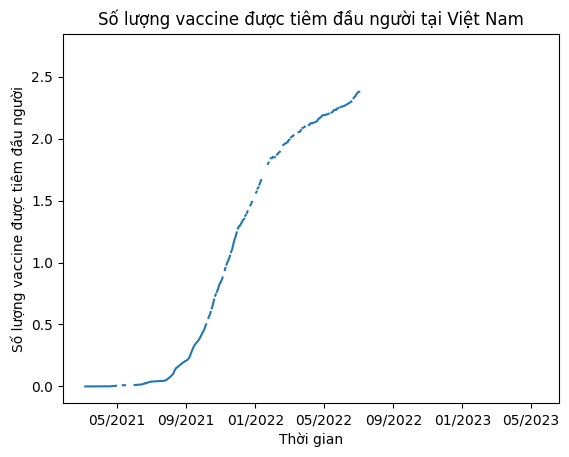

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

data_vn["date"] = pd.to_datetime(data_vn["date"])
# Số lượng vaccine được tiêm theo đầu người 
data_vn["vaccine_per_person"] = data_vn["total_vaccinations"] / data_vn["population"]

fig, ax = plt.subplots()

ax.plot(data_vn["date"], data_vn["vaccine_per_person"])
ax.set_title("Số lượng vaccine được tiêm đầu người tại Việt Nam")
ax.set_xlabel("Thời gian")
ax.set_ylabel("Số lượng vaccine được tiêm đầu người")

# Chỉnh xác trục hoành theo định dạng tháng và năm, cách nhau 4 tháng
month_locator = MonthLocator(interval=4)
date_formatter = DateFormatter('%m/%Y')
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(date_formatter)

plt.show()

In [ ]:
####
# Tổng số ca nhiễm và số ca tử vong của mỗi quốc gia
data_total_cases = data.groupby("location")["total_cases"].max().sort_values(ascending=False)
data_total_deaths = data.groupby("location")["total_deaths"].max().sort_values(ascending=False)

# In ra 10 quốc gia có số ca nhiễm và số ca tử vong cao nhất
print("Top 10 quốc gia có số ca nhiễm cao nhất:")
print(data_total_cases.head(10))
print("Top 10 quốc gia có số ca tử vong cao nhất:")
print(data_total_deaths.head(10))

Top 10 quốc gia có số ca nhiễm cao nhất:
location
World                  766440032.0
High income            421618451.0
Asia                   297229145.0
Europe                 249319125.0
Upper middle income    243775512.0
European Union         184065400.0
North America          124169393.0
United States          103436829.0
China                   99256991.0
Lower middle income     97534145.0
Name: total_cases, dtype: float64
Top 10 quốc gia có số ca tử vong cao nhất:
location
World                  6932578.0
High income            2879224.0
Upper middle income    2658752.0
Europe                 2061428.0
Asia                   1632001.0
North America          1601383.0
South America          1352145.0
Lower middle income    1342727.0
European Union         1231494.0
United States          1127152.0
Name: total_deaths, dtype: float64


In [ ]:
# Tỉ lệ tử vong của mỗi quốc gia
data["case_fatality_rate"] = data["total_deaths"] / data["total_cases"]
data_cfr = data.groupby("location")["case_fatality_rate"].max().sort_values(ascending=False)

# In ra 10 quốc gia có tỉ lệ tử vong caonhất
print("Top 10 quốc gia có tỉ lệ tử vong cao nhất:")
print(data_cfr.head(10))

Top 10 quốc gia có tỉ lệ tử vong cao nhất:
location
Mauritania                      29.800000
Zimbabwe                         5.000000
United Kingdom                   1.000000
Cayman Islands                   1.000000
Philippines                      1.000000
Guyana                           1.000000
Iran                             1.000000
Ireland                          1.000000
Sudan                            1.000000
Democratic Republic of Congo     0.822835
Name: case_fatality_rate, dtype: float64


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# Tính số ca nhiễm mới bằng cách lấy hiệu của số ca nhiễm của ngày hiện tại và ngày trước đó
df["new_cases"] = df.groupby("location")["total_cases"].diff()

# Tính tốc độ gia tăng của số ca nhiễm mới theo phần trăm
df["new_cases_pct_change"] = df.groupby("location")["new_cases"].pct_change() * 100

# Lấy bảng dữ liệu mới nhất
df_latest = df[df["date"] == df["date"].max()]

# Lấy 10 quốc gia có tốc độ gia tăng số ca nhiễm mới cao nhất
df_top_10 = df_latest.sort_values(by="new_cases_pct_change", ascending=False).head(10)

# Hiển thị top 10 quốc gia
print("Top 10 quốc gia tốc độ gia tăng số ca nhiễm mới cao nhất:")
print(df_top_10[["location", "new_cases_pct_change"]])

<ipython-input-14-90d27f62083e>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")


Top 10 quốc gia tốc độ gia tăng số ca nhiễm mới cao nhất:
                   location  new_cases_pct_change
16007                  Asia                   0.0
23398            Bangladesh                   0.0
125480                India                   0.0
158725  Lower middle income                   0.0
307698                World                   0.0
18472               Austria                   NaN
41865              Bulgaria                   NaN
68950               Czechia                   NaN
87340                Europe                   NaN
88573        European Union                   NaN


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# Lọc bảng dữ liệu theo các cột cần thiết và sắp xếp theo quốc gia và ngày
df = df[["location", "date", "new_cases"]]
df = df.sort_values(by=["location", "date"])

# Tính số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia
df["new_cases_avg"] = df.groupby("location")["new_cases"].rolling(window=7).mean().reset_index(0, drop=True)

# Lấy bảng dữ liệu mới nhất
df_latest = df[df["date"] == df["date"].max()]

# Hiển thị số ca nhiễm trung bình 7 ngày gần nhất của mỗi quc gia
print("Số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia:")
print(df_latest[["location", "new_cases_avg"]])

<ipython-input-17-f801312bc7dc>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")


Số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia:
                   location  new_cases_avg
16007                  Asia            NaN
18472               Austria            NaN
23398            Bangladesh            NaN
41865              Bulgaria            NaN
68950               Czechia            NaN
87340                Europe            NaN
88573        European Union            NaN
102116              Germany            NaN
105811               Greece            NaN
119354          High income            NaN
125480                India            NaN
134099                Italy            NaN
146411           Kyrgyzstan            NaN
156261            Lithuania            NaN
158725  Lower middle income            NaN
164446             Malaysia            NaN
191531          Netherlands            NaN
247490               Serbia            NaN
259802        South America            NaN
261035          South Korea            NaN
296703  Upper middle income            N

In [ ]:
import pandas as pd

# Tải tập dữ liệu COVID-19 từ Our World in Data
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Lọc dữ liệu để chỉ lấy thông tin về số ca nhiễm mới của mỗi quốc gia
df_cases = df[df['new_cases'].notna()]


# Tính toán số ca nhiễm trung bình 7 ngày gần nhất của mỗi quốc gia
df_cases['7_day_avg'] = df_cases.groupby('location')['new_cases'].rolling(7).mean().reset_index(0, drop=True)

# Sắp xếp các quốc gia theo số ca nhiễm trung bình 7 ngày gần nhất giảm dần và chọn 10 quốc gia có số ca nhiễm trung bình 7 ngày gần nhất nhiều nhất, chúng ta có thể sử dụng các lệnh sau:


# Sắp xếp các quốc gia theo số ca nhiễm trung bình 7 ngày gần nhất giảm dần
df_sorted = df_cases.sort_values(by=['7_day_avg'], ascending=False)

# Chọn 10 quốc gia có số ca nhiễm trung bình 7 ngày gần nhất nhiều nhất
top_countries = df_sorted.groupby('location').first().sort_values(by=['7_day_avg'], ascending=False).head(10)

print(top_countries[['iso_code', '7_day_avg']])


<ipython-input-31-0fc9ae7be6b8>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
<ipython-input-31-0fc9ae7be6b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases['7_day_avg'] = df_cases.groupby('location')['new_cases'].rolling(7).mean().reset_index(0, drop=True)


                     iso_code     7_day_avg
location                                   
World                OWID_WRL  6.410667e+06
Asia                 OWID_ASI  6.109943e+06
Upper middle income  OWID_UMC  5.952585e+06
China                     CHN  5.882129e+06
High income          OWID_HIC  2.354639e+06
Europe               OWID_EUR  1.566684e+06
European Union       OWID_EUN  1.263880e+06
North America        OWID_NAM  9.426073e+05
United States             USA  8.097353e+05
Lower middle income  OWID_LMC  4.599889e+05


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Lấy dữ liệu cho quốc gia Việt Nam
data_vn = data[data['iso_code'] == 'VNM']

# Chọn các đặc trưng quan tâm
features = ['total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_vaccinations_smoothed']

# Xóa các dòng chứa giá trị thiếu
data_vn.dropna(subset=features, inplace=True)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data, train_labels, test_labels = train_test_split(data_vn[features], data_vn['total_cases'], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data, train_labels)

# Dự đoán số ca nhiễm trong tương lai với tập kiểm tra
predictions = model.predict(test_data)

# Đánh giá hiệu suất mô hình bằng RMSE vàR-squared
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
print('RMSE:', rmse)
print('R-squared:', r_squared)

# Dự đoán số ca nhiễm hoặc số ca tử vong trong tương lai từ các đặc trưng mới
new_features = np.array([1000, 20, 50, 1, 5000]).reshape(1, -1)
new_predictions = model.predict(new_features)
print('New predictions:', new_predictions)

<ipython-input-32-3f992bc858e2>:8: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')


RMSE: 3.861321494006327e-09
R-squared: 1.0
New predictions: [1000.00000001]


<ipython-input-32-3f992bc858e2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vn.dropna(subset=features, inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pandas as pd

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Lấy dữ liệu cho quốc gia Trung Quốc
china_data = data.loc[data['iso_code'] == 'CHN']
# Chọn các đặc trưng quan trọng
features = ['new_cases', 'new_deaths', 'new_vaccinations']

# Xóa các dòng chứa giá trị thiếu
china_data.dropna(subset=features, inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data, train_labels, test_labels = train_test_split(china_data[features], china_data['new_cases'], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(train_data, train_labels)

# Dự đoán số ca nhiễm mới từ tập kiểm tra
predictions = model.predict(test_data)

# In ra các giá trị dự đoán và giá trị thực tế từ tập kiểm tra
for i in range(len(predictions)):
    print('Predicted:', predictions[i], '\tActual:', test_labels.reset_index(drop=True)[i])

<ipython-input-34-0109dbd8a61b>:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
<ipython-input-34-0109dbd8a61b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_data.dropna(subset=features, inplace=True)


Predicted: 1482.9999999999834 	Actual: 1483.0
Predicted: 37764.999999999774 	Actual: 37765.0
Predicted: 35861.9999999998 	Actual: 35862.0
Predicted: 8023.999999999941 	Actual: 8024.0
Predicted: 83.00000000021724 	Actual: 83.0
Predicted: 277003.9999999998 	Actual: 277004.0
Predicted: 25081.99999999978 	Actual: 25082.0
Predicted: 9390.999999999976 	Actual: 9391.0
Predicted: 212.99999999978394 	Actual: 213.0
Predicted: 101.00000000079658 	Actual: 101.0
Predicted: 288.0000000005201 	Actual: 288.0
Predicted: 102.00000000043386 	Actual: 102.0
Predicted: 73343.99999999981 	Actual: 73344.0
Predicted: 15717.00000000002 	Actual: 15717.0
Predicted: 41619.999999999774 	Actual: 41620.0
Predicted: 558.0000000007434 	Actual: 558.0
Predicted: 234.000000000467 	Actual: 234.0
Predicted: 45011.9999999998 	Actual: 45012.0
Predicted: 37.99999999987402 	Actual: 38.0
Predicted: 13947.000000000038 	Actual: 13947.0
Predicted: 58.00000000020354 	Actual: 58.0
Predicted: 2825.999999999896 	Actual: 2826.0
Predicte

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhập dữ liệu từ tập tin CSV vào dataframe
df = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [45]:
# Loại bỏ các cột không cần thiết
df = df.drop(['Lat', 'Long'], axis=1)

# Hiển thị 5 hàng đầu tiên của dataframe sau khi loại bỏ các cột không cần thiết
print(df.head())

  Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0        0        0        0  ...   209322  209340  209358  209362  209369   
1        0        0        0  ...   334391  334408  334408  334427  334427   
2        0        0        0  ...   271441  271448  271463  271469  271469   
3        0        0        0  ...    47866   47875   47875   47875   47875   
4        0        0        0  ...   105255  105277  105277  105277  105277   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209

In [47]:
# Hiển thị thông tin về số dòng và số cột trong dataframe
print("Kích thước của dataframe: ", df.shape)

Kích thước của dataframe:  (289, 1145)


In [48]:
# Hiển thị thông tin chi tiết về các cột trong dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1145 entries, Province/State to 3/9/23
dtypes: int64(1143), object(2)
memory usage: 2.5+ MB
None


<ipython-input-65-1eae2aa60200>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


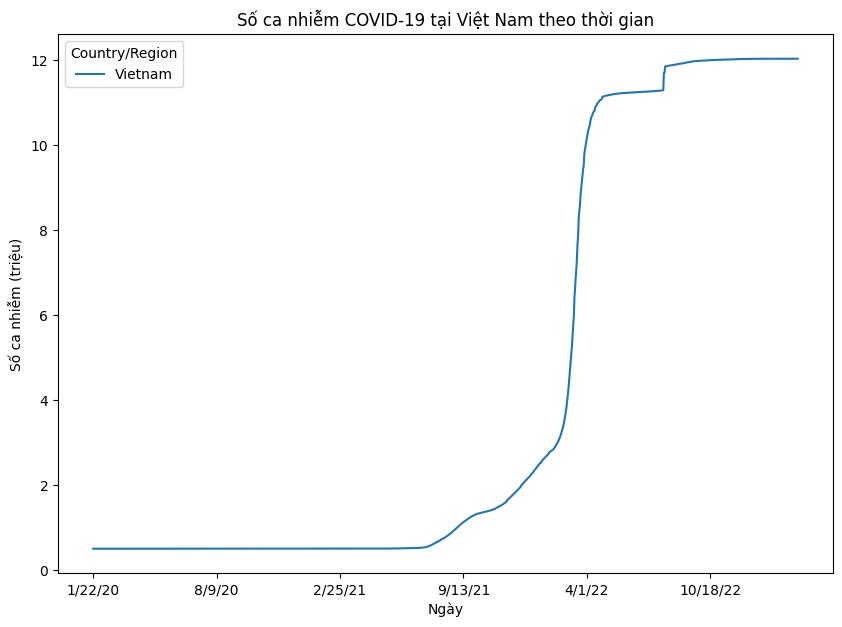

In [65]:
# Tạo dataframe mới chứa thông tin số ca nhiễm COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 0.5 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 0.5

# Vẽ biểu đồ đường (line chart) thể hiện số ca nhiễm COVID-19 theo thời gian tại Việt Nam
df_vn_per_million.plot(figsize=(10, 7))
plt.title('Số ca nhiễm COVID-19 tại Việt Nam theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm (triệu)')
plt.show()

<ipython-input-66-4e5e940e95fe>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


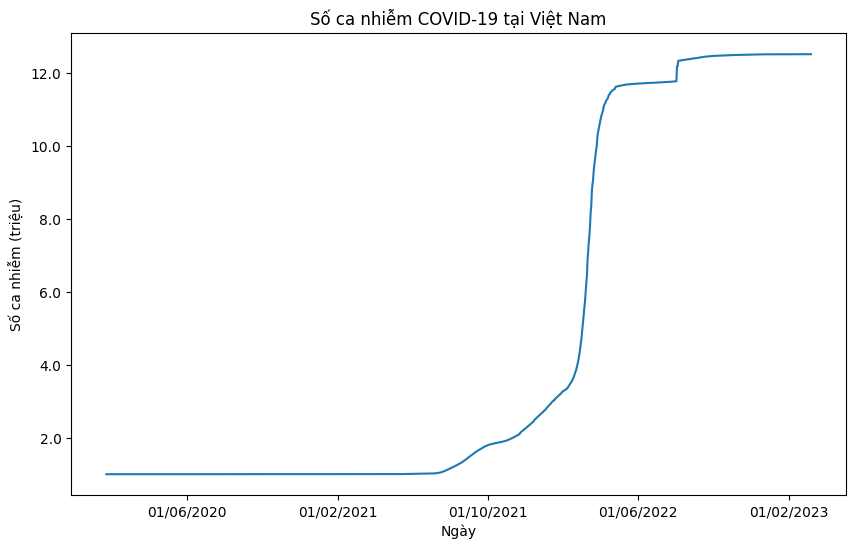

In [66]:
# Tạo dataframe mới chứa thông tin số ca nhiễm COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 2 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 1

# Chuyển đđổi ngày thành ngày, tháng và năm
df_vn_per_million.index = pd.to_datetime(df_vn_per_million.index)

# Vẽ biểu đồ đường (line chart) thể hiện số ca nhiễm COVID-19 theo thời gian tại Việt Nam
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vn_per_million.index, df_vn_per_million.values)
ax.set_title('Số ca nhiễm COVID-19 tại Việt Nam')
ax.set_xlabel('Ngày')
ax.set_ylabel('Số ca nhiễm (triệu)')
ax.yaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.show()

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
# Loại bỏ các cột không cần thiết
df = df.drop(['Lat', 'Long'], axis=1)

<ipython-input-90-249f30882e93>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


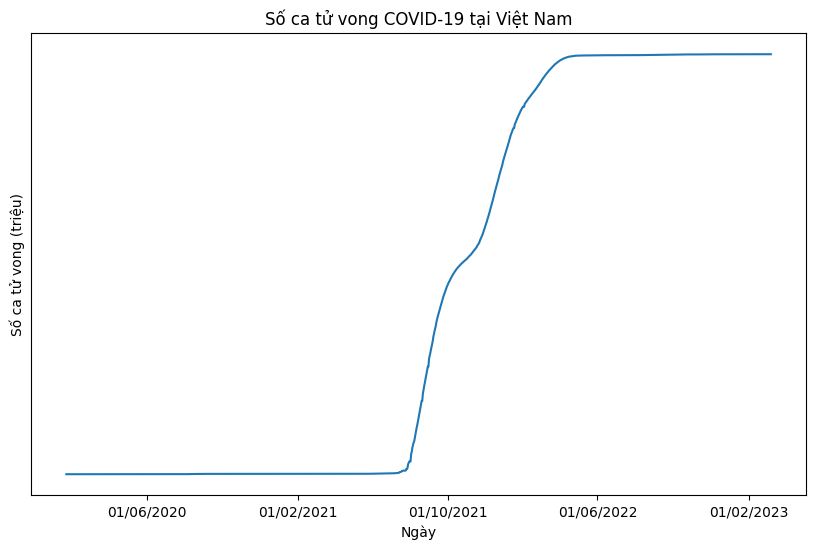

In [90]:
# Tạo dataframe mới chứa thông tin số ca tử vong COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 1 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 1

# Chuyển đổi ngày thành ngày, tháng và năm
df_vn_per_million.index = pd.to_datetime(df_vn_per_million.index)

# Vẽ biểu đồ đường (line chart) thể hiện số ca tử vong COVID-19 theo thời gian tại Việt Nam
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_vn_per_million.index, df_vn_per_million.values)
ax.set_title('Số ca tử vong COVID-19 tại Việt Nam')
ax.set_xlabel('Ngày')
ax.set_ylabel('Số ca tử vong (triệu)')
ax.yaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('/content/time_series_covid19_recovered_global.csv')
# Loại bỏ các cột không cần thiết
df = df.drop(['Lat', 'Long'], axis=1)

In [98]:
# Lấy thông tin về số ca hồi phục tại Việt Nam
vn_df = df[df['Country/Region'] == 'Vietnam']
vn_recovered = vn_df.iloc[:, 4:].sum(axis=0)
# Chia số lượng ca hồi phục cho 1 triệu
vn_recovered_per_million = vn_recovered / 1000000

<ipython-input-104-9fc19bbc5969>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T


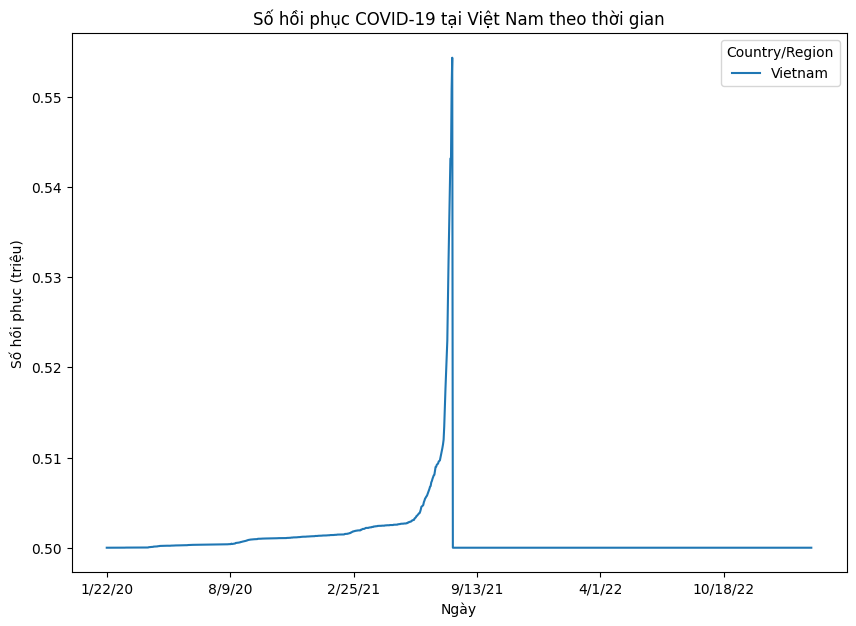

In [104]:
# Tạo dataframe mới chứa thông tin số ca hồi phục COVID-19 theo thời gian tại Việt Nam
df_vn = df[df['Country/Region'] == 'Vietnam'].groupby('Country/Region').sum().T

# Chia số ca cho 1 triệu và cách nhau 0.5 triệu
df_vn_per_million = df_vn / 1000000
df_vn_per_million = df_vn_per_million - df_vn_per_million.iloc[0] + 0.5

# Vẽ biểu đồ đường (line chart) thể hiện số hồi phục COVID-19 theo thời gian tại Việt Nam
df_vn_per_million.plot(figsize=(10, 7))
plt.title('Số hồi phục COVID-19 tại Việt Nam theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số hồi phục (triệu)')
plt.show()